# MACHINE LEARNING MODELS - MULTILAYER NETWORK 2 layers

In this notebook, we apply machine learning models to data derived from applying graph measures to a multilayer network, which includes both single and multi-layer measurements, but **only considering FA layer and fMRI layer**

This notebook is nearly identical to the one that deals exclusively with single layers and 3 layers, facilitating easy comparisons


In [ ]:
# Import libraries and functions

#Data Science usual libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Scikit-learn libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score


#OverSampling and UnderSampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# define random_state
RANDOM_STATE = 3

%matplotlib inline

### 1. Load data

We load our csv into a dataframe using pandas.

In [42]:
## Define paths


dataDir = "/data/"
singleLayerFile = "single_layer.csv"
multiLayerFile = "multi_layer.csv"

singleLayer = pd.read_csv(dataDir + singleLayerFile)
multiLayer = pd.read_csv(dataDir + multiLayerFile)

In [43]:
print(singleLayer.shape)
print(multiLayer.shape)

(165, 22)
(165, 35)


In [ ]:
list(singleLayer)

['id',
 'controls_ms',
 'mstype',
 'age',
 'sex',
 'dd',
 'edss',
 'FA_diameter',
 'fMRI_diameter',
 'fMRI_gl-efficiency',
 'fMRI_mean_path-length',
 'fMRI_gl-transitivity',
 'fMRI_density',
 'FA_loc-clos-cent_ctx-lh-isthmuscingulate',
 'FA_loc-clos-cent_Left-Hippocampus',
 'FA_loc-clos-cent_ctx-rh-caudalanteriorcingulate',
 'FA_loc-clos-cent_ctx-rh-lateralorbitofrontal',
 'FA_loc-clos-cent_ctx-rh-precentral',
 'FA_loc-strength_Right-Caudate',
 'fMRI_loc-clos-cent_ctx-rh-entorhinal',
 'fMRI_loc-clos-cent_ctx-rh-parahippocampal',
 'fMRI_loc-clos-cent_ctx-rh-paracentral']

In [ ]:
singleLayer.head()

,id,controls_ms,mstype,age,sex,dd,edss,FA_diameter,fMRI_diameter,fMRI_gl-efficiency,...,fMRI_density,FA_loc-clos-cent_ctx-lh-isthmuscingulate,FA_loc-clos-cent_Left-Hippocampus,FA_loc-clos-cent_ctx-rh-caudalanteriorcingulate,FA_loc-clos-cent_ctx-rh-lateralorbitofrontal,FA_loc-clos-cent_ctx-rh-precentral,FA_loc-strength_Right-Caudate,fMRI_loc-clos-cent_ctx-rh-entorhinal,fMRI_loc-clos-cent_ctx-rh-parahippocampal,fMRI_loc-clos-cent_ctx-rh-paracentral
0,002MSVIS,PwMS,SPMS,51.53,Male,22.18,7.5,0.332354,0.065675,93.889111,...,0.974737,0.064372,0.096570,0.077665,0.079250,0.074236,10.638695,0.603022,0.537120,0.559320
1,003MSVIS,PwMS,PPMS,58.06,Female,9.57,6.0,0.301074,0.075368,55.937286,...,0.966316,0.068736,0.079853,0.082105,0.071313,0.079974,9.515183,0.373515,0.391899,0.570189
2,004MSVIS,PwMS,RRMS,60.78,Male,6.79,3.0,0.306527,0.087877,61.506756,...,0.958947,0.071388,0.098190,0.071972,0.079739,0.080090,9.860426,0.406553,0.554453,0.648328
3,005MSVIS,PwMS,RRMS,37.95,Female,8.45,1.5,0.360501,0.066865,82.930529,...,0.976140,0.064019,0.077450,0.070209,0.074123,0.064426,8.655474,0.467528,0.890219,0.487918
4,010MSVIS,PwMS,RRMS,52.64,Female,9.05,2.0,0.342449,0.065693,61.978222,...,0.963158,0.065071,0.080101,0.069243,0.068634,0.072694,10.569179,0.668055,0.517563,0.839344


In [ ]:
multiLayer.head()

,id,controls_ms,mstype,age,sex,dd,edss,MultiPRCent_ctx-lh-inferiorparietal,MultiPRCent_Left-Accumbens-area,MultiPRCent_Right-Caudate,...,MultiPath_ctx-rh-inferiortemporal,MultiPath_ctx-rh-lateraloccipital,MultiPath_ctx-rh-lingual,MultiPath_ctx-rh-paracentral,MultiPath_ctx-rh-parsorbitalis,MultiPath_ctx-rh-parstriangularis,MultiPath_ctx-rh-pericalcarine,MultiPath_ctx-rh-superiorparietal,MultiPath_ctx-rh-superiortemporal,MultiPath_ctx-rh-supramarginal
0,002MSVIS,PwMS,SPMS,51.53,Male,22.18,7.5,0.862105,0.580730,0.723504,...,33.527417,24.388924,76.054810,47.874146,234.930592,97.832555,234.392716,34.331554,53.301632,313.112310
1,003MSVIS,PwMS,PPMS,58.06,Female,9.57,6.0,0.884077,0.806608,0.877228,...,51.235080,35.802710,20.659865,59.031482,126.507671,59.029978,43.054020,34.801036,26.061783,41.043100
2,004MSVIS,PwMS,RRMS,60.78,Male,6.79,3.0,0.887790,0.535733,0.752004,...,35.913710,43.719158,89.440645,63.474852,40.524232,52.205209,97.212368,44.900025,62.221249,171.291961
3,005MSVIS,PwMS,RRMS,37.95,Female,8.45,1.5,0.932885,0.493189,0.760803,...,24.402396,56.659582,71.616396,39.401952,67.035793,63.090969,47.405410,102.735806,37.805278,52.259500
4,010MSVIS,PwMS,RRMS,52.64,Female,9.05,2.0,0.977357,0.548800,0.809000,...,85.415088,49.779619,24.878326,106.878465,32.265436,92.763042,31.445178,89.825278,81.146861,47.178405


In [44]:
# Concatenate data frames to gather all data

all_data = pd.concat([singleLayer, multiLayer.iloc[:, 7:]], join = "inner", axis = 1)

all_data.shape

(165, 50)

## 2. Remove highly correlated data

Graph measures could exhibit high correlation (for example, diameter measures and mean path length, different centrality measures, and so on). Most machine learning algorithms perform better without highly correlated features. Therefore, we will remove any columns that are significantly correlated with others, retaining only one representative measure from each set of correlated measures.

We set our threshold at 0.8, accounting for both positive and negative correlations, and remove all correlated columns over (or below) threshold.

In [45]:
selected_columns = all_data.iloc[:, 7:] 
colnames = list(selected_columns)

pos_threshold = 0.8
neg_threshold = -0.8

highly_correlated_columns = {} #Dictionary to store correlations
columns_to_remove = []
for i,colname in enumerate(colnames):
    columns_to_dict = [] # Dictionary values
    if selected_columns.columns[i] not in columns_to_remove: #Column not in the list to remove
        for j in range(i+1, len(colnames)):
            if selected_columns.columns[j] not in columns_to_remove: #Column not in the list to remove
                matrix_coef = np.corrcoef(selected_columns.iloc[:, i], selected_columns.iloc[:, j]) 
                if matrix_coef[0,1] > pos_threshold or matrix_coef[0,1] < neg_threshold:
                    columns_to_remove.append(selected_columns.columns[j])
                    columns_to_dict.append(selected_columns.columns[j])
        highly_correlated_columns[colname] = columns_to_dict

columns_to_remove = set(columns_to_remove) #just in case we have some repeated columns
print("Can remove " +str(len(columns_to_remove)) + " features")

# Select column that are not in the list
filtered_columns = [col for col in selected_columns.columns if col not in columns_to_remove] 
filtered_df = selected_columns[filtered_columns]

# Final dataframe
final_data = pd.concat([all_data.iloc[:, :7], filtered_df], join = "inner", axis = 1)
final_data.head()


Can remove 9 features


,id,controls_ms,mstype,age,sex,dd,edss,FA_diameter,fMRI_diameter,fMRI_gl-efficiency,...,MultiSTSum_Right-Thalamus-Proper,MultiSTSum_ctx-rh-inferiorparietal,MultiSTSum_ctx-rh-superiorfrontal,MultiSTSum_ctx-rh-superiortemporal,MultiPath_ctx-lh-lateraloccipital,MultiPath_ctx-lh-pericalcarine,MultiPath_ctx-lh-precuneus,MultiPath_ctx-lh-supramarginal,MultiPath_Left-Accumbens-area,MultiPath_ctx-rh-superiorparietal
0,002MSVIS,PwMS,SPMS,51.53,Male,22.18,7.5,0.332354,0.065675,93.889111,...,30.731027,34.974737,56.195174,40.722663,77.795450,113.733167,64.186044,52.703518,689.959892,51.470548
1,003MSVIS,PwMS,PPMS,58.06,Female,9.57,6.0,0.301074,0.075368,55.937286,...,35.844303,38.200251,53.267982,42.426642,46.551148,83.524268,40.299180,40.751312,109.436556,39.262600
2,004MSVIS,PwMS,RRMS,60.78,Male,6.79,3.0,0.306527,0.087877,61.506756,...,36.745742,35.645762,50.668714,45.193010,79.384546,61.563700,74.681403,31.225727,104.659071,45.468482
3,005MSVIS,PwMS,RRMS,37.95,Female,8.45,1.5,0.360501,0.066865,82.930529,...,34.118122,36.883135,55.010716,44.606681,37.883356,91.516103,47.070550,88.923005,107.904849,102.843536
4,010MSVIS,PwMS,RRMS,52.64,Female,9.05,2.0,0.342449,0.065693,61.978222,...,35.323594,36.149344,54.705097,43.989355,40.897744,79.886554,121.280869,56.496038,102.811904,91.088859


In [ ]:
final_data.shape

(165, 62)

In [ ]:
len_correlations ={key:len(highly_correlated_columns[key]) for key in highly_correlated_columns.keys()}
len_correlations

{'FA_diameter': 0,
 'fMRI_diameter': 1,
 'fMRI_gl-efficiency': 0,
 'fMRI_gl-transitivity': 1,
 'FA_loc-clos-cent_ctx-lh-isthmuscingulate': 0,
 'FA_loc-clos-cent_Left-Hippocampus': 1,
 'FA_loc-clos-cent_ctx-rh-caudalanteriorcingulate': 0,
 'FA_loc-clos-cent_ctx-rh-lateralorbitofrontal': 0,
 'FA_loc-strength_Right-Caudate': 0,
 'fMRI_loc-clos-cent_ctx-rh-entorhinal': 0,
 'fMRI_loc-clos-cent_ctx-rh-parahippocampal': 0,
 'fMRI_loc-clos-cent_ctx-rh-paracentral': 0,
 'MultiPRCent_ctx-lh-inferiorparietal': 0,
 'MultiPRCent_Left-Accumbens-area': 1,
 'MultiPRCent_Right-Caudate': 1,
 'MultiPRCent_Right-Accumbens-area': 1,
 'MultiPRCent_ctx-rh-inferiorparietal': 1,
 'MultiPRCent_ctx-rh-superiorfrontal': 1,
 'MultiPRCent_ctx-rh-superiortemporal': 1,
 'MultiPath_ctx-lh-cuneus': 0,
 'MultiPath_ctx-lh-inferiorparietal': 0,
 'MultiPath_ctx-lh-inferiortemporal': 0,
 'MultiPath_ctx-lh-isthmuscingulate': 0,
 'MultiPath_ctx-lh-lateraloccipital': 0,
 'MultiPath_ctx-lh-lateralorbitofrontal': 0,
 'MultiPath_

## 2. Define functions

We define some functions we will use throught the notebook

It is worth noting that in our pipepline needs scaling (normalize) our values, as SMOTE and machine learning models perform better with normalized values



In [ ]:
def make_pipeline(model, num_neighbors = 5):
    """
    Function that creates a pipeline with Standard Scaler, SMOTE and model selected
    INPUT 
    model --> a scikit model like RandomForestClassifier()
    num_neighbors --> an int, default 5. Indicates number of neighbors SMOTE will use
    
    Returns 
    a pipeline from imblearn
    """
    over = SMOTE(random_state = RANDOM_STATE, k_neighbors= num_neighbors)    
    sc = StandardScaler()
    model = model
    steps = [('Scaler', sc), ('over', over), ('model', model)]
    pipeline = Pipeline(steps = steps)
    
    return pipeline

def search_grid(model, param_grid, num_neighbors = 5):
    """
    Function to perfrom GridSearchCV on a model.
    
    INPUT: 
    model --> a scikit model like RandomForestClassifier()
    param_grid --> a dict with parameters to perform GridSearchCV
    num_neighbors --> an int, default 5. Indicates number of neighbors SMOTE will use
    
    CALLS make_pripeline 
    
    PRINTS  GridSearchCV best parameters
    
    RETURNS GridSearchCV result
    
    """
  # Depending if we are doing a binary classification (HS - PWMS) o multiclass (different MStypes)
  # we choose a scoring type
    if len(le_name_mapping.keys()) > 2:
        scoring = "f1_weighted"
    else:
        scoring = "f1"

    #Perform Grid Search    
    GridSearch_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring = scoring)
    pipeline = make_pipeline(GridSearch_model, num_neighbors = num_neighbors)
    pipeline.fit(X_train, y_train) 
    
    
    print(GridSearch_model.best_params_)
    
    return GridSearch_model

def plot_hist_GridSearch(means, model_name):
    """
    Function to plot a histogram from a list of means that represent Mean Test Scores 
    from GridSearchCV
    INPUT
    means --> a list of numbers
    model_name <- a string to identify model
    """
    #plt.hist(scores, bins = 10)
    sns.histplot(means, bins=10)
    xmin = min(means)
    if xmin > 0.9:
        xmin = 0.9
    plt.xlim(xmin, 1)
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.title(model_name, fontsize = 18)

In [ ]:
def create_model(X_train, X_test, y_train, y_test, model, num_neighbors = 5):
    """
    Function to create a model and get scoring results from cross_validate and predict.
    
    INPUT
    X_train, X_test, y_train, y_test as values from train_test_split

    model --> a scikit model like RandomForestClassifier()
    num_neighbors --> an int, default 5. Indicates number of neighbors SMOTE will use
    
    CALL make_pipeline
    
    RETURNS in this order
    Confusion matrix on test data
    fitted model
    dataframe with results of the diferents scores. Scores iused will vary depending on whether we
    have binary class or multi class 
    
    """
    model_name = model.__class__.__name__
    pipeline = make_pipeline(model, num_neighbors = num_neighbors)

  # Depending if we are doing a binary classification (HS - PWMS) o multiclass (different MStypes)
  # we choose a scoring type
    if len(le_name_mapping.keys()) > 2:
        scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average = 'weighted'),
               'recall': make_scorer(recall_score, average = 'weighted'),
               'f1':make_scorer(f1_score, average = 'weighted')}
        n_splits = 4
    else:
        n_splits = 5
        scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
               'f1':make_scorer(f1_score),
               'roc_auc': make_scorer(roc_auc_score)}
    
    stratified_cv = StratifiedKFold(n_splits= n_splits, shuffle=True, random_state= RANDOM_STATE)
    cv_results = cross_validate(pipeline, X_train, y_train, cv = stratified_cv, scoring = scoring)
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    confMat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    
    # We will have to return diferent values depending on binary classification or multiclass
    if len(le_name_mapping.keys()) > 2:
        results = {'accuracy': np.mean(cv_results['test_accuracy']),
               'precision': np.mean(cv_results['test_precision']),
               'recall': np.mean(cv_results['test_recall']),
               'f1_score': np.mean(cv_results['test_f1']),
               'Errors': np.triu(confMat, k = 1).sum() + np.tril(confMat, k = -1).sum()}
    else:
        results = {'accuracy': np.mean(cv_results['test_accuracy']),
               'precision': np.mean(cv_results['test_precision']),
               'recall': np.mean(cv_results['test_recall']),
               'f1_score': np.mean(cv_results['test_f1']),
               'roc_auc': np.mean(cv_results['test_roc_auc']),
               'False Positive (Type I)': confMat[0,1],
               'False Negative (Type II)': confMat[1,0]}
    
    
    model_pd = pd.DataFrame.from_dict(results, orient = 'index', columns = [model_name])

    return (confMat, model, model_pd)

def plot_confusion_matrix(confMat, labels, model_name):
    """
    Function to display confusion matrix
    INPUT
    confMat <- a confusion matrix
    labels <- a list of labels to display
    model_name <- a string with model name to display in title
    
    """
    ax = sns.heatmap(confMat, annot = True, cbar = False, cmap=sns.cubehelix_palette(as_cmap=True))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title(model_name, fontsize = 18)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")

## 3. BINARY CLASSIFICATION 
## Healthy Subjects (HS) and Patients with Multiple Sclerosis (PwMS)

In this section, we will deploy machine learning models to attempt to distinguish between healthy subjects and patients with Multiple Sclerosis, without differentiating patients by their specific illness phenotype

First we divide our dataset in train and test. 

In [90]:
X = final_data.iloc[:,7:]
y = final_data["controls_ms"]

# Our values are encoded in labels rather than in 0s and 1s, so we use label encoder
le = LabelEncoder()
y = le.fit_transform(y)

# Create a dictionary with correspondences between labels and encoded labels
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= RANDOM_STATE)

We will apply our models in 2 steps:

    1. Grid search looking for the best parameters
    2. Apply models with best parameters from step 1.
    
 At the end we will compare all our models results.

### 3.1. RANDOM FOREST FOR BINARY CLASSIFICATION

In [48]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 5, 7, 10, 15]
}

for i in range(10):
  GridSearch_RF = search_grid(RandomForestClassifier(random_state = i), param_grid)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 150}
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 25}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 150}
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 25}
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 25}
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 75}
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 25}


Triarem els valors que més es repeteixen.

In [73]:
max_depth = 5
max_features = 'sqrt'
n_estimators = 25
importance_list = []
for i in range(10):
  model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = i)
  rf_confMat, model_name, rf_pd= create_model(X_train, X_test, y_train, y_test, model = model)
  importances_rf = pd.Series(model_name.feature_importances_, index = X.columns)
  importance_list.append(importances_rf)

In [79]:
df_imp = pd.concat(importance_list, axis = 1)
df_imp['mean'] = df_imp.mean(axis = 1)
df_imp['std'] = df_imp.std(axis = 1)
df_imp = df_imp.sort_values('mean', ascending = False)
df_imp

,0,1,2,3,4,5,6,7,8,9,mean,std
MultiPRCent_Right-Accumbens-area,0.060092,0.089283,0.110675,0.077618,0.100479,0.104170,0.136405,0.147024,0.080379,0.127441,0.103357,0.026271
MultiPRCent_Left-Accumbens-area,0.097908,0.100771,0.086460,0.113407,0.090923,0.086579,0.092736,0.056633,0.118609,0.077896,0.092192,0.016701
fMRI_gl-efficiency,0.069468,0.081254,0.086146,0.138188,0.153840,0.084936,0.104938,0.050953,0.088591,0.063191,0.092151,0.030592
fMRI_loc-clos-cent_ctx-rh-entorhinal,0.091008,0.098358,0.018121,0.058891,0.043185,0.082685,0.037989,0.073047,0.048847,0.098270,0.065040,0.026410
fMRI_loc-clos-cent_ctx-rh-paracentral,0.054231,0.038450,0.040052,0.054510,0.049401,0.040522,0.086009,0.101848,0.051573,0.048816,0.056541,0.019803
MultiPath_ctx-lh-precuneus,0.046448,0.059458,0.044439,0.026676,0.026827,0.070944,0.070246,0.060091,0.043782,0.049230,0.049814,0.014844
FA_loc-clos-cent_ctx-rh-caudalanteriorcingulate,0.041115,0.027197,0.042304,0.048646,0.050916,0.054377,0.031475,0.042289,0.055849,0.095474,0.048964,0.017816
fMRI_gl-transitivity,0.038216,0.030369,0.110487,0.080714,0.045105,0.040551,0.022023,0.040729,0.055305,0.014221,0.047772,0.027142
MultiPath_ctx-rh-superiorparietal,0.037036,0.036484,0.048315,0.010618,0.051080,0.049830,0.030075,0.044673,0.026787,0.098674,0.043357,0.021904
MultiPath_ctx-lh-pericalcarine,0.036831,0.024387,0.021314,0.021266,0.040391,0.067369,0.035876,0.049952,0.034377,0.036191,0.036795,0.013276


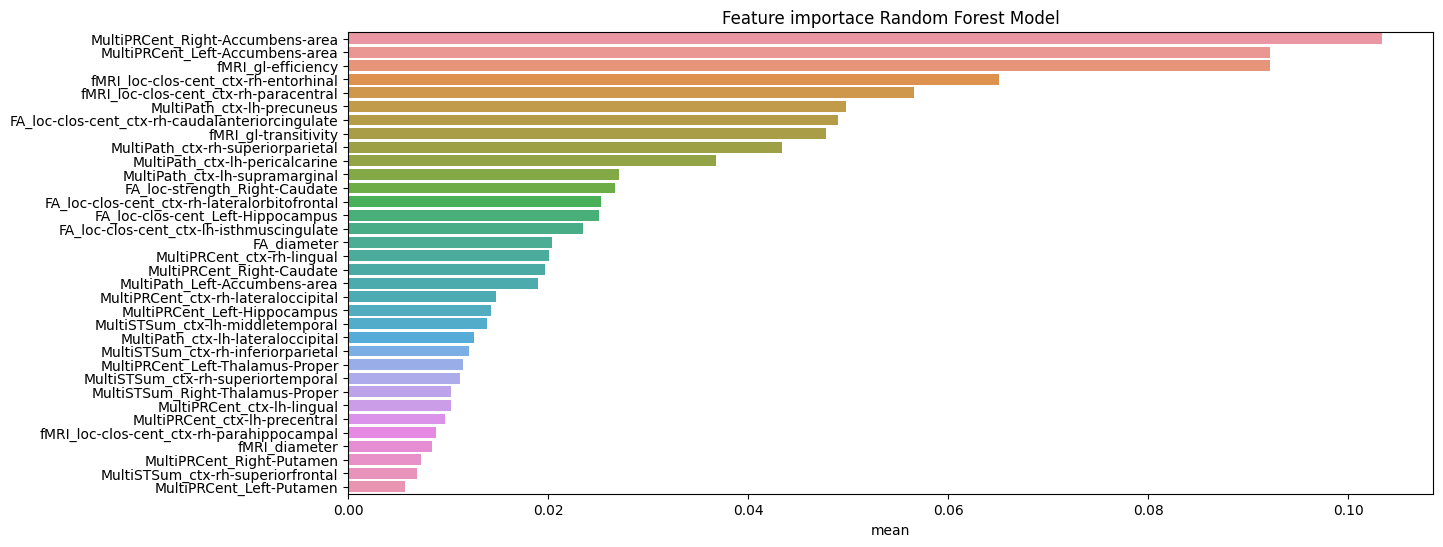

In [82]:
plt.figure(figsize=(14, 6))
sns.barplot(x = df_imp['mean'], y = df_imp.index)
plt.title('Feature importace Random Forest Model')
plt.show()

### 3.4. XGBOOST FOR BINARY CLASSIFICATION

In [91]:
param_grid =[{"learning_rate": [0.20, 0.25, 0.30],
              "max_depth": [4, 5, 6, 7],
                     "min_child_weight": [ 1, 3],
                     "gamma": [0.0, 0.05, 0.1, 0.2],
                     "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
                     "verbosity": [0]}]# add this line to slient warning message

for i in range(10):
  GridSearch_XGB = search_grid(XGBClassifier(random_state = i), param_grid)

{'colsample_bytree': 0.3, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.25, 'max_depth': 4, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3, 'verbosity': 0}
{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.25, 'max_depth': 6, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.2,

We choose most repeated values

In [92]:
learning_rate = 0.2
max_depth = 5
min_child_weight = 1
gamma = 0.2
colsample_bytree = 0.5

importance_list = []
for i in range(10):
  model = XGBClassifier(random_state = i, 
                      learning_rate = learning_rate, 
                      max_depth = max_depth,
                     min_child_weight = min_child_weight,
                     gamma = gamma,
                     colsample_bytree = colsample_bytree,
                     verbosity = 0)
  XGB_confMat, model_name, XGB_pd = create_model(X_train, X_test, y_train, y_test, model = model)
  importances_xgb = pd.Series(model_name.feature_importances_, index = X.columns)
  importance_list.append(importances_xgb)

In [93]:
df_imp = pd.concat(importance_list, axis = 1)
df_imp['mean'] = df_imp.mean(axis = 1)
df_imp['std'] = df_imp.std(axis = 1)
df_imp = df_imp.sort_values('mean', ascending = False)
df_imp

,0,1,2,3,4,5,6,7,8,9,mean,std
fMRI_gl-efficiency,0.090095,0.149496,0.107576,0.145410,0.084036,0.154979,0.156822,0.099768,0.150972,0.128611,0.126776,0.027241
MultiPRCent_Right-Accumbens-area,0.105367,0.154322,0.094540,0.142702,0.151522,0.103231,0.074412,0.112373,0.139999,0.152597,0.123106,0.027079
FA_loc-clos-cent_ctx-rh-caudalanteriorcingulate,0.039283,0.074534,0.023975,0.035750,0.035000,0.091569,0.033117,0.054050,0.097210,0.044230,0.052872,0.024558
MultiPath_ctx-lh-precuneus,0.069950,0.036884,0.023478,0.020153,0.047727,0.023688,0.071550,0.059197,0.038912,0.040385,0.043192,0.017784
fMRI_loc-clos-cent_ctx-rh-entorhinal,0.066180,0.049792,0.089773,0.017148,0.023374,0.035973,0.033713,0.041881,0.032578,0.040871,0.043128,0.020185
FA_loc-clos-cent_Left-Hippocampus,0.084555,0.077405,0.038781,0.025637,0.014909,0.028406,0.016701,0.034910,0.006843,0.057643,0.038579,0.025130
MultiPRCent_Left-Accumbens-area,0.041763,0.037887,0.040463,0.024064,0.027854,0.031108,0.049683,0.022920,0.037304,0.038093,0.035114,0.008037
fMRI_gl-transitivity,0.018219,0.036582,0.034355,0.048247,0.022938,0.031847,0.045191,0.041835,0.030815,0.032890,0.034292,0.008848
FA_diameter,0.007562,0.018863,0.031281,0.113727,0.051184,0.016332,0.025081,0.032249,0.020252,0.015362,0.033189,0.029175
fMRI_loc-clos-cent_ctx-rh-paracentral,0.043225,0.031974,0.031130,0.027133,0.030298,0.032088,0.011796,0.047989,0.023959,0.028306,0.030790,0.009385


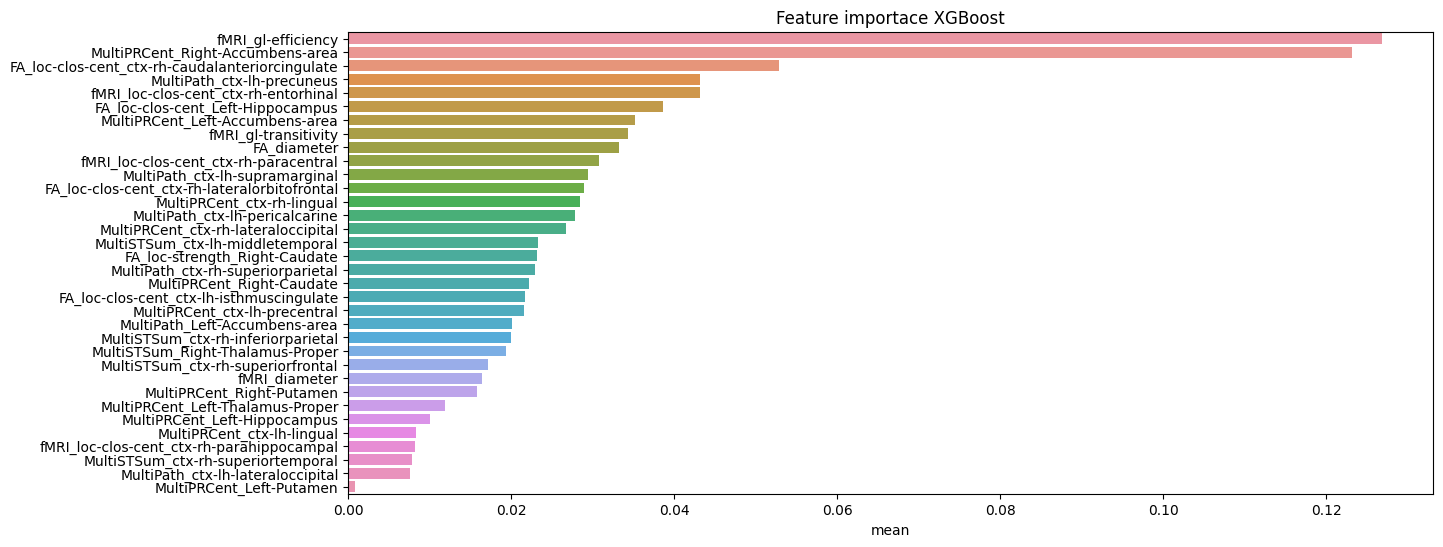

In [94]:
plt.figure(figsize=(14, 6))
sns.barplot(x = df_imp['mean'], y = df_imp.index)
plt.title('Feature importace XGBoost')
plt.show()

## 4. MULTICLASS CLASSIFICATION 
## RRMS vs SPMS vs PPMS

Remove HS subjects from data and obtaining new train and test datasets

In [95]:
## Remove HS from our data
final_data_types = final_data[final_data.mstype != "HS"]


X = final_data_types.iloc[:,7:]
y = final_data_types["mstype"]
le = LabelEncoder()
y = le.fit_transform(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= RANDOM_STATE)

### 4.1. RANDOM FOREST FOR MULTICLASS

We have to set number of neighbors to a lower number than 3 cause we have very few data samples from our original dataset


In [88]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 5, 7, 10, 15]
}
for i in range(10):
  GridSearch_RF = search_grid(RandomForestClassifier(random_state = i), param_grid, num_neighbors = 2)


{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 150}
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 75}
{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 75}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 150}
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

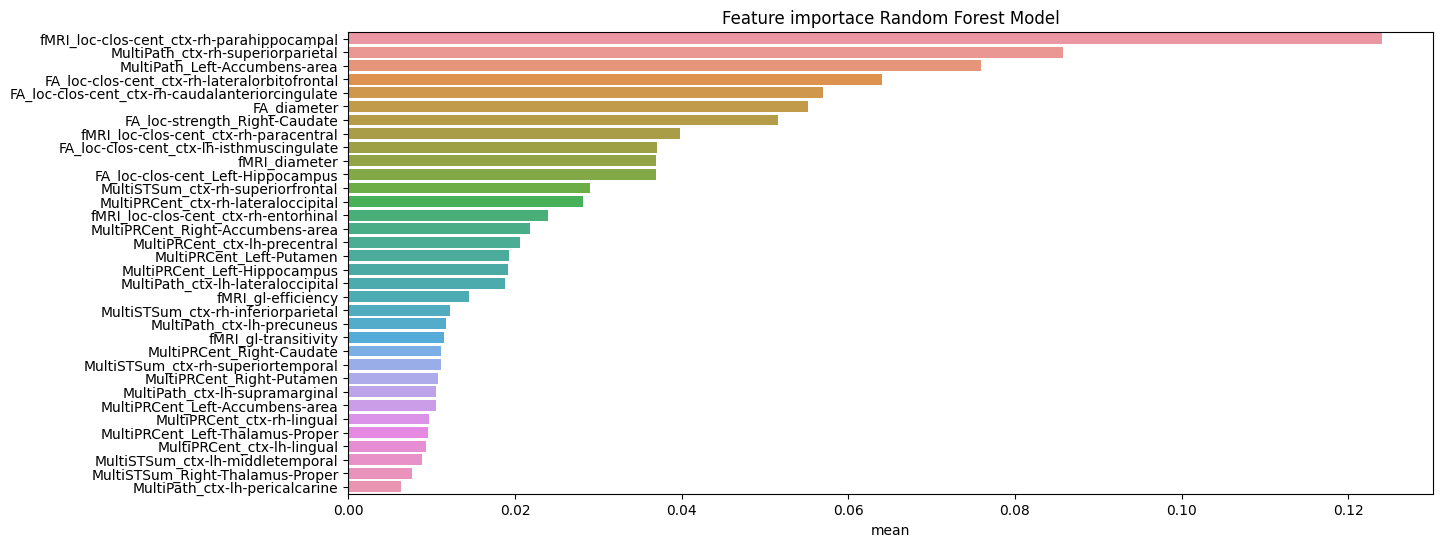

In [96]:
max_depth = 7
max_features = 'sqrt'
n_estimators = 50

importance_list = []
for i in range(10):
  model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = i)
  rf_confMat, model_name, rf_pd= create_model(X_train, X_test, y_train, y_test, model = model, num_neighbors = 2)
  importances_rf = pd.Series(model_name.feature_importances_, index = X.columns)
  importance_list.append(importances_rf)

df_imp = pd.concat(importance_list, axis = 1)
df_imp['mean'] = df_imp.mean(axis = 1)
df_imp['std'] = df_imp.std(axis = 1)
df_imp = df_imp.sort_values('mean', ascending = False)

plt.figure(figsize=(14, 6))
sns.barplot(x = df_imp['mean'], y = df_imp.index)
plt.title('Feature importace Random Forest Model')
plt.show()



### 4.4. XGBOOST FOR MULTICLASS

In [97]:
from xgboost import XGBClassifier

param_grid =[{"learning_rate": [0.15, 0.20, 0.25],
              "max_depth": [ 3, 4, 5, 6],
                     "min_child_weight": [ 1, 3],
                     "gamma": [0.0, 0.05, 0.1, 0.2],
                     "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
                     "verbosity": [0]}]# add this line to silent warning message

for i in range(10):
  GridSearch_XGB = search_grid(XGBClassifier(random_state = i), param_grid, num_neighbors = 2)

{'colsample_bytree': 0.3, 'gamma': 0.2, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.05, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 1, 'verbosity': 0}
{'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate':

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

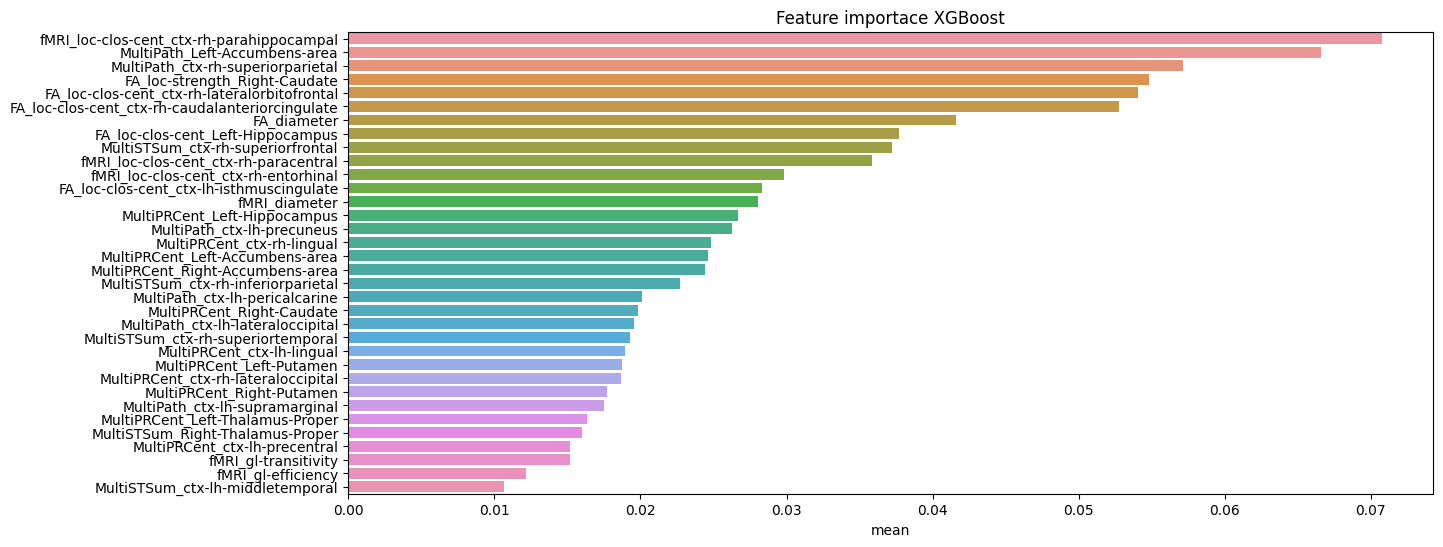

In [98]:
learning_rate = 0.15
max_depth = 5
min_child_weight =1
gamma = 0.0
colsample_bytree = 0.3


importance_list = []
for i in range(10):
  model = XGBClassifier(random_state = i, 
                      learning_rate = learning_rate, 
                      max_depth = max_depth,
                     min_child_weight = min_child_weight,
                     gamma = gamma,
                     colsample_bytree = colsample_bytree,
                     verbosity = 0)
  XGB_confMat, model_name, XGB_pd = create_model(X_train, X_test, y_train, y_test,  model = model, num_neighbors = 2)
  importances_xgb = pd.Series(model_name.feature_importances_, index = X.columns)
  importance_list.append(importances_xgb)

df_imp = pd.concat(importance_list, axis = 1)
df_imp['mean'] = df_imp.mean(axis = 1)
df_imp['std'] = df_imp.std(axis = 1)
df_imp = df_imp.sort_values('mean', ascending = False)

plt.figure(figsize=(14, 6))
sns.barplot(x = df_imp['mean'], y = df_imp.index)
plt.title('Feature importace XGBoost')
plt.show()
